In [107]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px
import hdbscan
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import OPTICS


df = pd.read_csv(r'2022.csv')
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [108]:
#!pip install kneed

In [109]:
null_rows = df[df.isnull().any(axis=1)]
df = df.drop(146)
df = df.drop(['RANK', 'Country','Whisker-high','Whisker-low'], axis=1)
df.head()

,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [110]:
df = df.replace(',', '', regex=True)
scaler1 = StandardScaler()
df = pd.DataFrame(scaler1.fit_transform(df), columns=df.columns)

/Users/user/opt/anaconda3/envs/salesprediction/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/user/opt/anaconda3/envs/salesprediction/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/user/opt/anaconda3/envs/salesprediction/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/user/opt/anaconda3/envs/salesprediction/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

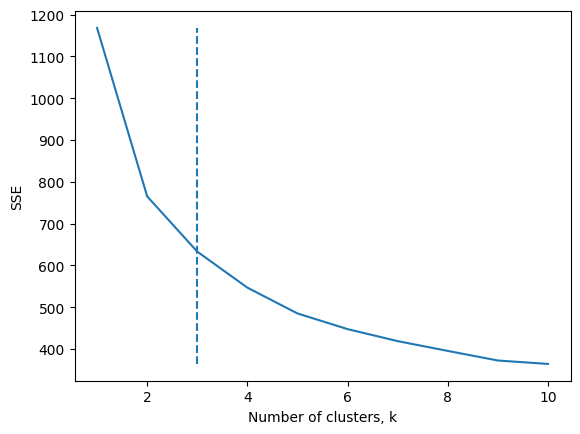

The optimal value of k is 3.


In [56]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse[k] = kmeans.inertia_

# use KneeLocator to find optimal k
kl = KneeLocator(list(sse.keys()), list(sse.values()), curve='convex', direction='decreasing')
optimal_k = kl.elbow

# plot SSE vs. k with elbow point
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')
plt.vlines(optimal_k, ymin=min(sse.values()), ymax=max(sse.values()), linestyle='--')
plt.show()

print(f'The optimal value of k is {optimal_k}.')

In [57]:
# perform k-means clustering with k=2
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

# print the cluster centers and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels:\n", kmeans.labels_)

Cluster Centers:
 [[ 1.3894885   0.12161811  1.29910342  0.97322836  1.12887489  0.95814218
   0.51776587  1.90844409]
 [-1.02160861 -0.18065468 -1.01154469 -1.0221168  -1.0084081  -0.71352343
   0.18430893 -0.26790841]
 [ 0.36103406  0.09784021  0.37849041  0.4754469   0.42285112  0.25553285
  -0.275667   -0.32835255]]
Cluster Labels:
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 1 2 2 1 1 2 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/user/opt/anaconda3/envs/salesprediction/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



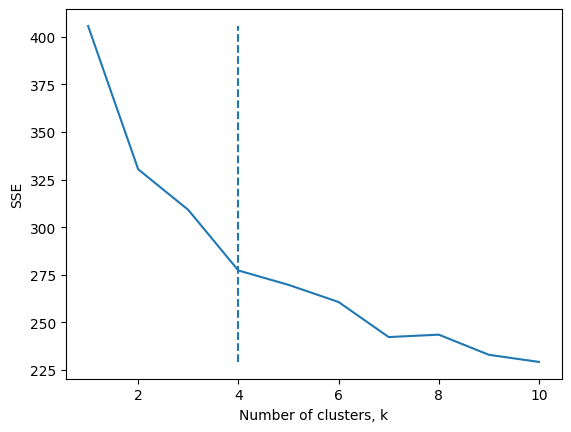

The optimal value of k is 4.


In [58]:
sse = {}
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(df)
    sse[k] = kmedoids.inertia_

# use KneeLocator to find optimal k
kl = KneeLocator(list(sse.keys()), list(sse.values()), curve='convex', direction='decreasing')
optimal_k = kl.elbow

# plot SSE vs. k with elbow point
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')
plt.vlines(optimal_k, ymin=min(sse.values()), ymax=max(sse.values()), linestyle='--')
plt.show()

print(f'The optimal value of k is {optimal_k}.')

In [59]:
# perform k-means clustering with k=2
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(df)

# print the cluster centers and labels
print("Cluster Centers:\n", kmedoids.cluster_centers_)
print("Cluster Labels:\n", kmedoids.labels_)

Cluster Centers:
 [[-0.00607078 -0.39914594  0.38683575  0.41960434  0.41443229 -0.39368929
  -0.14999406 -0.61207675]
 [ 0.47771942  0.25731873  0.4296708   0.75274594 -0.10340345  0.49377259
  -0.19847028 -0.37599924]
 [-0.95795567  0.20292595 -0.86014028 -1.76551799 -1.20736096 -0.47624388
   0.40748247 -0.33665299]
 [ 1.35851301  0.17291613  1.13168975  1.01066201  1.12005461  0.97534106
   0.84376845  1.67787506]]
Cluster Labels:
 [3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 1 1 3 1 1 1 3 1 1 3 1 1 1 0 1 1 1 1 3 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 0 0 1 2 0 0 0 2 0 0 0 1 2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2
 0 2 2 2 2 2 2 2 0 2 0 2 0 2 2 0 2 0 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2]


In [84]:
# define parameter ranges
eps_range = np.linspace(0.1, 6.0, num=10)
min_samples_range = range(2,10)

# perform grid search
best_score = -1
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df)
        if len(set(dbscan.labels_)) > 1 and len(set(dbscan.labels_)) <145:
            score = silhouette_score(df, dbscan.labels_)
            #print(score)
            #print(best_params)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# print best parameters
print('Best parameters:', best_params)

-0.2835715482170741
{'eps': 3.3777777777777778, 'min_samples': 2}
-0.21771345463589117
{'eps': 0.7555555555555555, 'min_samples': 2}
-0.16097369785139884
{'eps': 0.7555555555555555, 'min_samples': 3}
-0.12268545500969462
{'eps': 0.7555555555555555, 'min_samples': 4}
-0.07801398664926663
{'eps': 1.4111111111111112, 'min_samples': 2}
0.11831799399501328
{'eps': 1.4111111111111112, 'min_samples': 3}
0.10578092544825865
{'eps': 1.4111111111111112, 'min_samples': 4}
0.13226989296413244
{'eps': 1.4111111111111112, 'min_samples': 4}
0.12242140903194215
{'eps': 1.4111111111111112, 'min_samples': 6}
0.12157496122188736
{'eps': 1.4111111111111112, 'min_samples': 6}
0.11789919927259418
{'eps': 1.4111111111111112, 'min_samples': 6}
0.2554605478117242
{'eps': 1.4111111111111112, 'min_samples': 6}
0.31431707250631163
{'eps': 2.066666666666667, 'min_samples': 2}
0.31431707250631163
{'eps': 2.066666666666667, 'min_samples': 3}
0.31431707250631163
{'eps': 2.066666666666667, 'min_samples': 3}
0.29998464

In [101]:
# perform k-means clustering with k=2
dbscans = DBSCAN(eps=1, min_samples=2).fit(df)

# print labels
print("Cluster Labels:\n", dbscans.labels_)
len(df)

Cluster Labels:
 [-1  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0 -1  1 -1 -1  2 -1 -1
 -1  1 -1  1  1 -1  1 -1  2  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1
 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1  1  3  1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  4  5 -1 -1 -1 -1 -1 -1 -1
 -1  5  4 -1  6  7 -1  6 -1 -1 -1 -1  7 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1
 -1  8 -1 -1 -1 -1 -1 -1  9 -1 -1 -1  8  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


146

In [102]:
hdbscanclusterer = hdbscan.HDBSCAN()
hdbscanclusterer.fit(df)

# print labels
print("Cluster Labels:\n", hdbscanclusterer.labels_)

Cluster Labels:
 [-1  2 -1  2  2  2  2  2 -1  2  2  2  2  2  2 -1  2  1  1  1  1  1  1 -1
  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1
  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  0  1 -1 -1 -1 -1 -1 -1 -1
  0  1  0 -1 -1  0  0  0 -1 -1 -1 -1  0 -1  0 -1  0 -1 -1  0  0  0 -1 -1
  0 -1  0 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


1
2
3
4
5


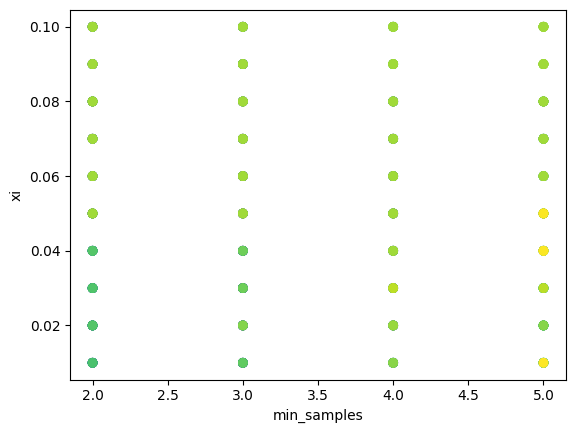

Best hyperparameters: [5.   0.01 0.09]
Best silhouette score: 0.23985985556782216


In [144]:
# Define a grid of hyperparameters to test
min_samples_range = range(1, 6)
xi_range = np.linspace(0.01, 0.1, 10)
min_cluster_size_range = np.linspace(0.01, 0.1, 10)

# Initialize lists to store the metric scores and hyperparameters
silhouette_scores = []
params = []

# Loop over all combinations of hyperparameters
for min_samples in min_samples_range:
    print(min_samples)
    for xi in xi_range:
        #print("xi is: ", xi)
        for min_cluster_size in min_cluster_size_range:
            #print("min_cluster_size is: ", min_cluster_size)
            # Create OPTICS object
            optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
            # Fit the model
            optics.fit(df)
            # Get cluster labels
            labels = optics.labels_
            # Compute the silhouette score
            if (len(set(labels)) > 1 and len(set(labels)) <145):
                score = silhouette_score(df, labels)
                # Store the score and hyperparameters
                silhouette_scores.append(score)
                params.append((min_samples, xi, min_cluster_size))

# Convert the lists to numpy arrays
silhouette_scores = np.array(silhouette_scores)
params = np.array(params)

# Find the hyperparameters that give the best silhouette score
best_params = params[np.argmax(silhouette_scores)]
best_score = np.max(silhouette_scores)

# Plot the results
fig, ax = plt.subplots()
ax.scatter(params[:, 0], params[:, 1], c=silhouette_scores)
ax.set_xlabel('min_samples')
ax.set_ylabel('xi')
#ax.set_zlabel('min_cluster_size')
plt.show()

print('Best hyperparameters:', best_params)
print('Best silhouette score:', best_score)

In [145]:
# Create OPTICS object
optics = OPTICS(min_samples=5, xi=0.01, min_cluster_size=0.09)

# Fit the model
optics.fit(df)

# Get cluster labels
labels = optics.labels_

# Print the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters:', n_clusters)


Number of clusters: 4


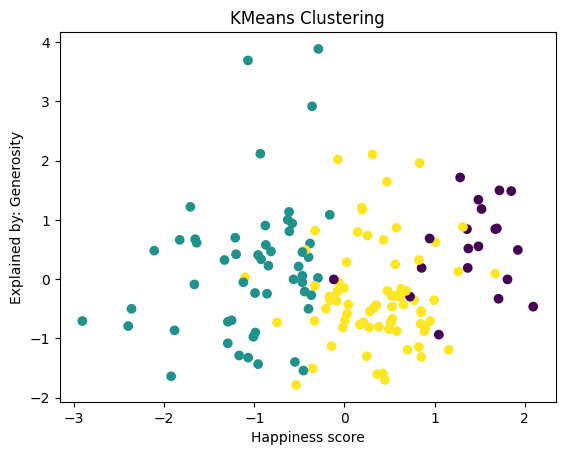

In [146]:
#X = np.random.rand(146, 2)
col1 = 0
col2 = 6
plt.scatter(df.iloc[:, col1], df.iloc[:, col2], c=kmeans.labels_)
plt.title('KMeans Clustering')
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.show()

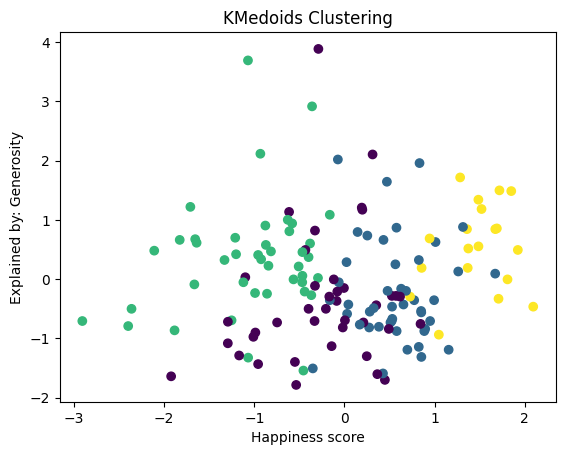

In [147]:
#X = np.random.rand(146, 2)
col1 = 0
col2 = 6
plt.scatter(df.iloc[:, col1], df.iloc[:, col2], c=kmedoids.labels_)
plt.title('KMedoids Clustering')
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.show()

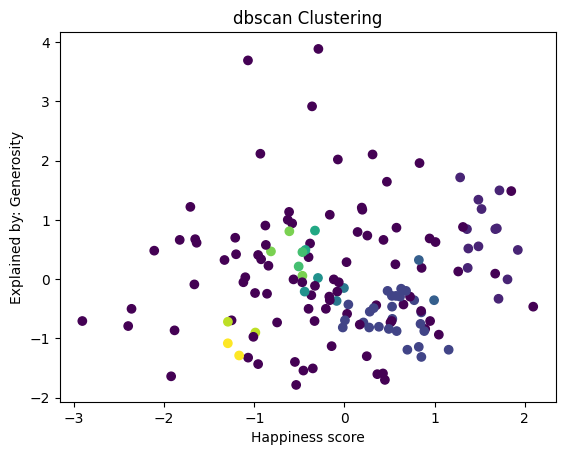

In [148]:
#X = np.random.rand(146, 2)
col1 = 0
col2 = 6
plt.scatter(df.iloc[:, col1], df.iloc[:, col2], c=dbscans.labels_)
plt.title('dbscan Clustering')
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.show()

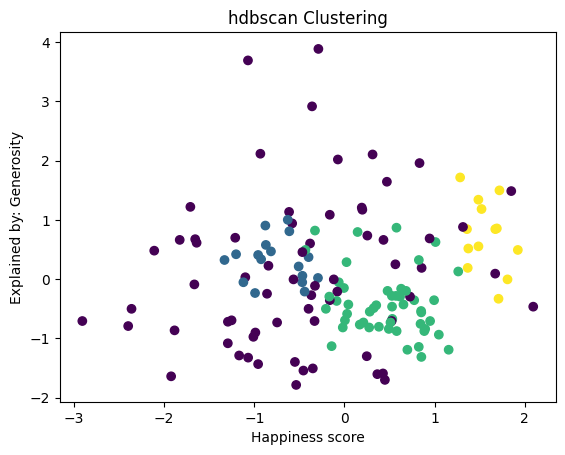

In [149]:
#X = np.random.rand(146, 2)
col1 = 0
col2 = 6
plt.scatter(df.iloc[:, col1], df.iloc[:, col2], c=hdbscanclusterer.labels_)
plt.title('hdbscan Clustering')
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.show()

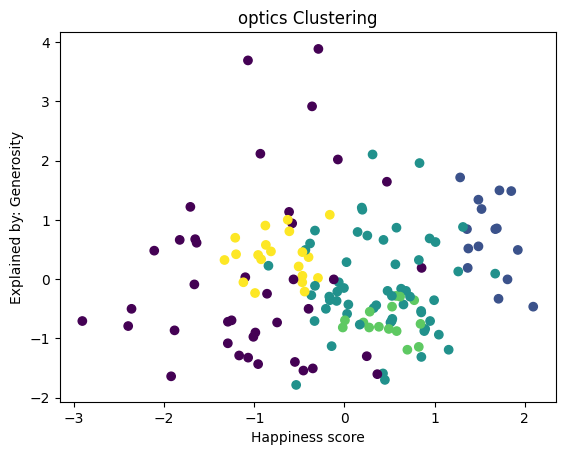

In [150]:
#X = np.random.rand(146, 2)
col1 = 0
col2 = 6
plt.scatter(df.iloc[:, col1], df.iloc[:, col2], c=optics.labels_)
plt.title('optics Clustering')
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.show()

In [45]:
df['cluster'] = kmeans.labels_
fig = px.scatter_3d(df, x='Happiness score',y = 'Explained by: GDP per capita', z='Explained by: Social support', color = 'cluster')
fig.show()

In [46]:
df['cluster'] = kmedoids.labels_
fig = px.scatter_3d(df, x='Happiness score',y = 'Explained by: GDP per capita', z='Explained by: Social support', color = 'cluster')
fig.show()

In [47]:
df['cluster'] = dbscans.labels_
fig = px.scatter_3d(df, x='Happiness score',y = 'Explained by: GDP per capita', z='Explained by: Social support', color = 'cluster')
fig.show()

In [32]:
df['cluster'] = hdbscanclusterer.labels_
fig = px.scatter_3d(df, x='Happiness score',y = 'Explained by: GDP per capita', z='Explained by: Social support', color = 'cluster')
fig.show()

In [151]:
df['cluster'] = optics.labels_
fig = px.scatter_3d(df, x='Happiness score',y = 'Explained by: GDP per capita', z='Explained by: Social support', color = 'cluster')
fig.show()